# Mapping of amino acids to numerical space

## Naive mapping

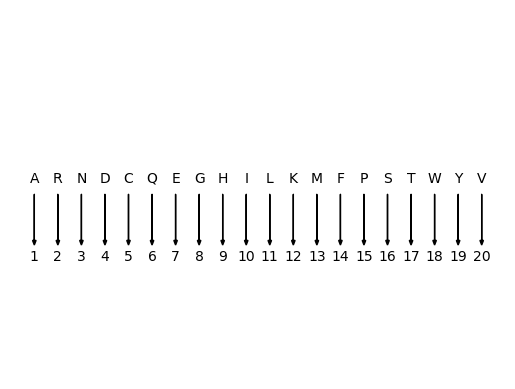

In [31]:
import matplotlib.pyplot as plt
import numpy as np

def plot_amino_acids():
    amino_acids = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']

    for i, aa in enumerate(amino_acids, start=1):
        plt.text(i, 0.001, aa, ha='center', va='bottom', fontsize=10)  # plot text
        plt.text(i, -0.006, str(i), ha='center', va='top', fontsize=10)  # plot number
        plt.arrow(i, 0, 0, -0.005, head_width=0.15, head_length=0.0005, fc='k', ec='k')  # plot arrow

    plt.ylim(-0.02, 0.02)  # set y-axis limits
    plt.axis('off')  # turn off the axis
    plt.savefig('plots/naive_mapping.png')
    plt.show()

plot_amino_acids()

## mapping to vectors

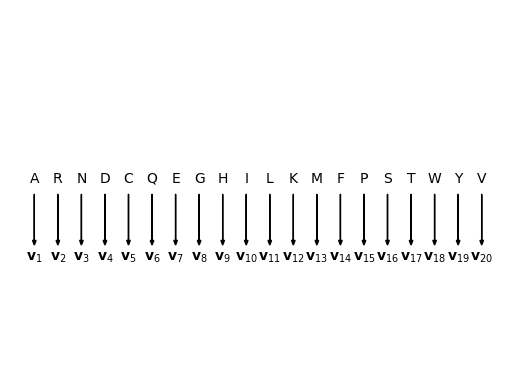

In [37]:
import matplotlib.pyplot as plt
import numpy as np

def plot_amino_acids():
    amino_acids = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']

    for i, aa in enumerate(amino_acids, start=1):
        plt.text(i, 0.001, aa, ha='center', va='bottom', fontsize=10)  # plot text
        plt.text(i, -0.006, r'$\mathbf{{v}}_{{{}}}$'.format(i), ha='center', va='top', fontsize=10)  # plot vector
        plt.arrow(i, 0, 0, -0.005, head_width=0.15, head_length=0.0005, fc='k', ec='k')  # plot arrow

    plt.ylim(-0.02, 0.02)  # set y-axis limits
    plt.axis('off')  # turn off the axis
    plt.savefig('plots/vector_mapping.png')
    plt.show()

plot_amino_acids()


# Fitness landscape of proteins

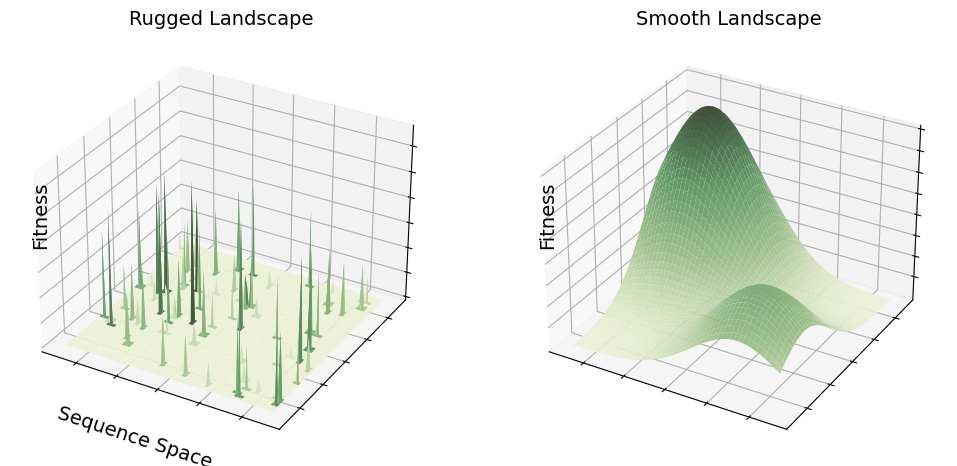

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap

# Create a grid of points
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)

# Define the rugged landscape as a mostly flat surface with some random spikes
np.random.seed(0)  # for reproducibility
z1 = np.zeros(x.shape)  # create a flat surface
indices = np.random.choice(z1.size, size=int(0.01*z1.size), replace=False)  # select 1% of the indices
z1.ravel()[indices] = np.abs(np.random.normal(0, 5, indices.size))  # set the selected indices to random high values

# Define the smooth landscape as a surface with two Gaussian hills of different heights
z2 = 2*np.exp(-0.1*((x+3)**2 + (y-3)**2)) + np.exp(-0.1*((x-3)**2 + (y+3)**2))

# Create a custom colormap
colors = ["#EDF1D6", "#9DC08B", "#609966", "#40513B"]
cmap = LinearSegmentedColormap.from_list("custom", colors)

# Create the 3D plots
fig = plt.figure(figsize=(12, 6))

# Plot the rugged landscape
ax1 = fig.add_subplot(1, 2, 1, projection='3d')  # 1 row, 2 columns, first plot
ax1.plot_surface(x, y, z1, cmap=cmap)
ax1.set_title('Rugged Landscape', fontsize=14)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_zticklabels([])
ax1.text2D(0.05, 0.5, "Fitness", transform=ax1.transAxes, rotation='vertical', fontsize=14)
ax1.set_xlabel('Sequence Space', fontsize=14)

# Plot the smooth landscape
ax2 = fig.add_subplot(1, 2, 2, projection='3d')  # 1 row, 2 columns, second plot
ax2.plot_surface(x, y, z2, cmap=cmap)
ax2.set_title('Smooth Landscape', fontsize=14)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_zticklabels([])
ax2.text2D(0.05, 0.5, "Fitness", transform=ax2.transAxes, rotation='vertical', fontsize=14)

plt.show()


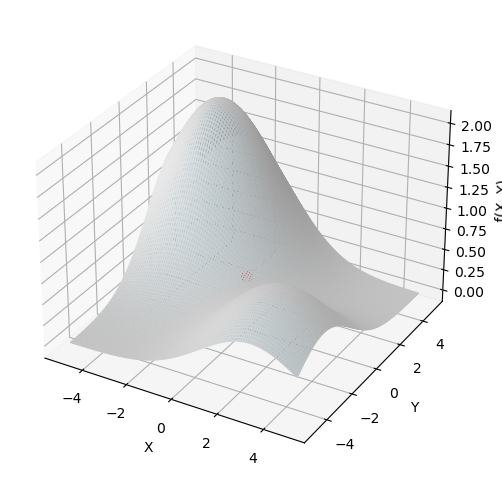

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def f(x, y):
    return 2*np.exp(-0.1*((x+3)**2 + (y-3)**2)) + np.exp(-0.1*((x-3)**2 + (y+3)**2))

# Define the gradient of the function
def gradient(x, y):
    dx = -0.2*(x+3)*np.exp(-0.1*((x+3)**2 + (y-3)**2)) - 0.2*(x-3)*np.exp(-0.1*((x-3)**2 + (y+3)**2))
    dy = -0.2*(y-3)*np.exp(-0.1*((x+3)**2 + (y-3)**2)) - 0.2*(y+3)*np.exp(-0.1*((x-3)**2 + (y+3)**2))
    return np.array([dx, dy])

# Initialize the starting point
x_start = 0
y_start = 0

# Initialize lists to store the x, y coordinates and function values at each step
x_list = [x_start]
y_list = [y_start]
z_list = [f(x_start, y_start)]

# Set the learning rate and the number of steps
learning_rate = 0.1
num_steps = 50

# Perform gradient descent
for _ in range(num_steps):
    grad = gradient(x_list[-1], y_list[-1])
    x_new = x_list[-1] - learning_rate * grad[0]
    y_new = y_list[-1] - learning_rate * grad[1]
    x_list.append(x_new)
    y_list.append(y_new)
    z_list.append(f(x_new, y_new))

# Create a grid of points
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Create a 3D plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.5, rstride=1, cstride=1, color='skyblue', edgecolors='w')
ax.scatter(x_list, y_list, z_list, color='red', s=50, alpha=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')

# Plot the gradient descent path
for i in range(1, len(x_list)):
    ax.plot([x_list[i-1], x_list[i]], [y_list[i-1], y_list[i]], [z_list[i-1], z_list[i]], color='red')

# Show the plot
plt.show()
